# <font color=tomato>Federal Home Loan Bank Members

- Federal Home Loan Bank(FHLB, 미국 연방주택대출은행)
    - FHLB 시스템은 모기지 대출 및 관련 지역 사회 투자를 지원하기 위한 미국 연방정부 후원기관(GSE) 중 하나로 1932년 연방 주택 대출 은행법(Federal Home Loan Bank Act)에 의해 만들어짐
    - 11개의 은행이 있다(밑에 있는 그림 참고)
    - FHLBanks에는 11개의 은행이 있으며 지역 사회 은행, 신용 조합, 상업 및 저축 은행, 보험 회사, 지역 사회 개발 금융 기관을 비롯한 모든 유형의 금융 기관에 대출 가능한 자금을 공급함.

[FHLB 설명(위키백과)](https://en.wikipedia.org/wiki/Federal_Home_Loan_Banks)
[FHLB 공식사이트](https://fhlbanks.com/)  

[데이터 출처](https://catalog.data.gov/dataset/federal-home-loan-bank-members)

- 데이터 설명
    - 변수들에 대한 설명에 약간의 추측이 있음
    - FHLB 회원들의 거주지, 이름, 회원 종류, 각종 아이디 등 개인정보가 담겨있는 듯
    
    
        - fhfb_id : fhlb 회원의 등록 id
        - district : 지역
        - member_name : 회원의 이름
        - city : 도시
        - state : 주
        - zip : 우편번호
        - mem_type : 회원 종류
        - char_type : 가입 유형(연방(Federal) or 주(State))
        - cert : 인증번호
        - fed_id
        - ots_id
        - ncua_id
        - appr_date : 가입일
        
        
 - id 3개(fed_id, ots_id, ncua_id)는 회원들을 식별하기 위한 의도로 만들어진 것으로 추정
 - 범주형 데이터가 대부분

In [1]:
from IPython.display import Image

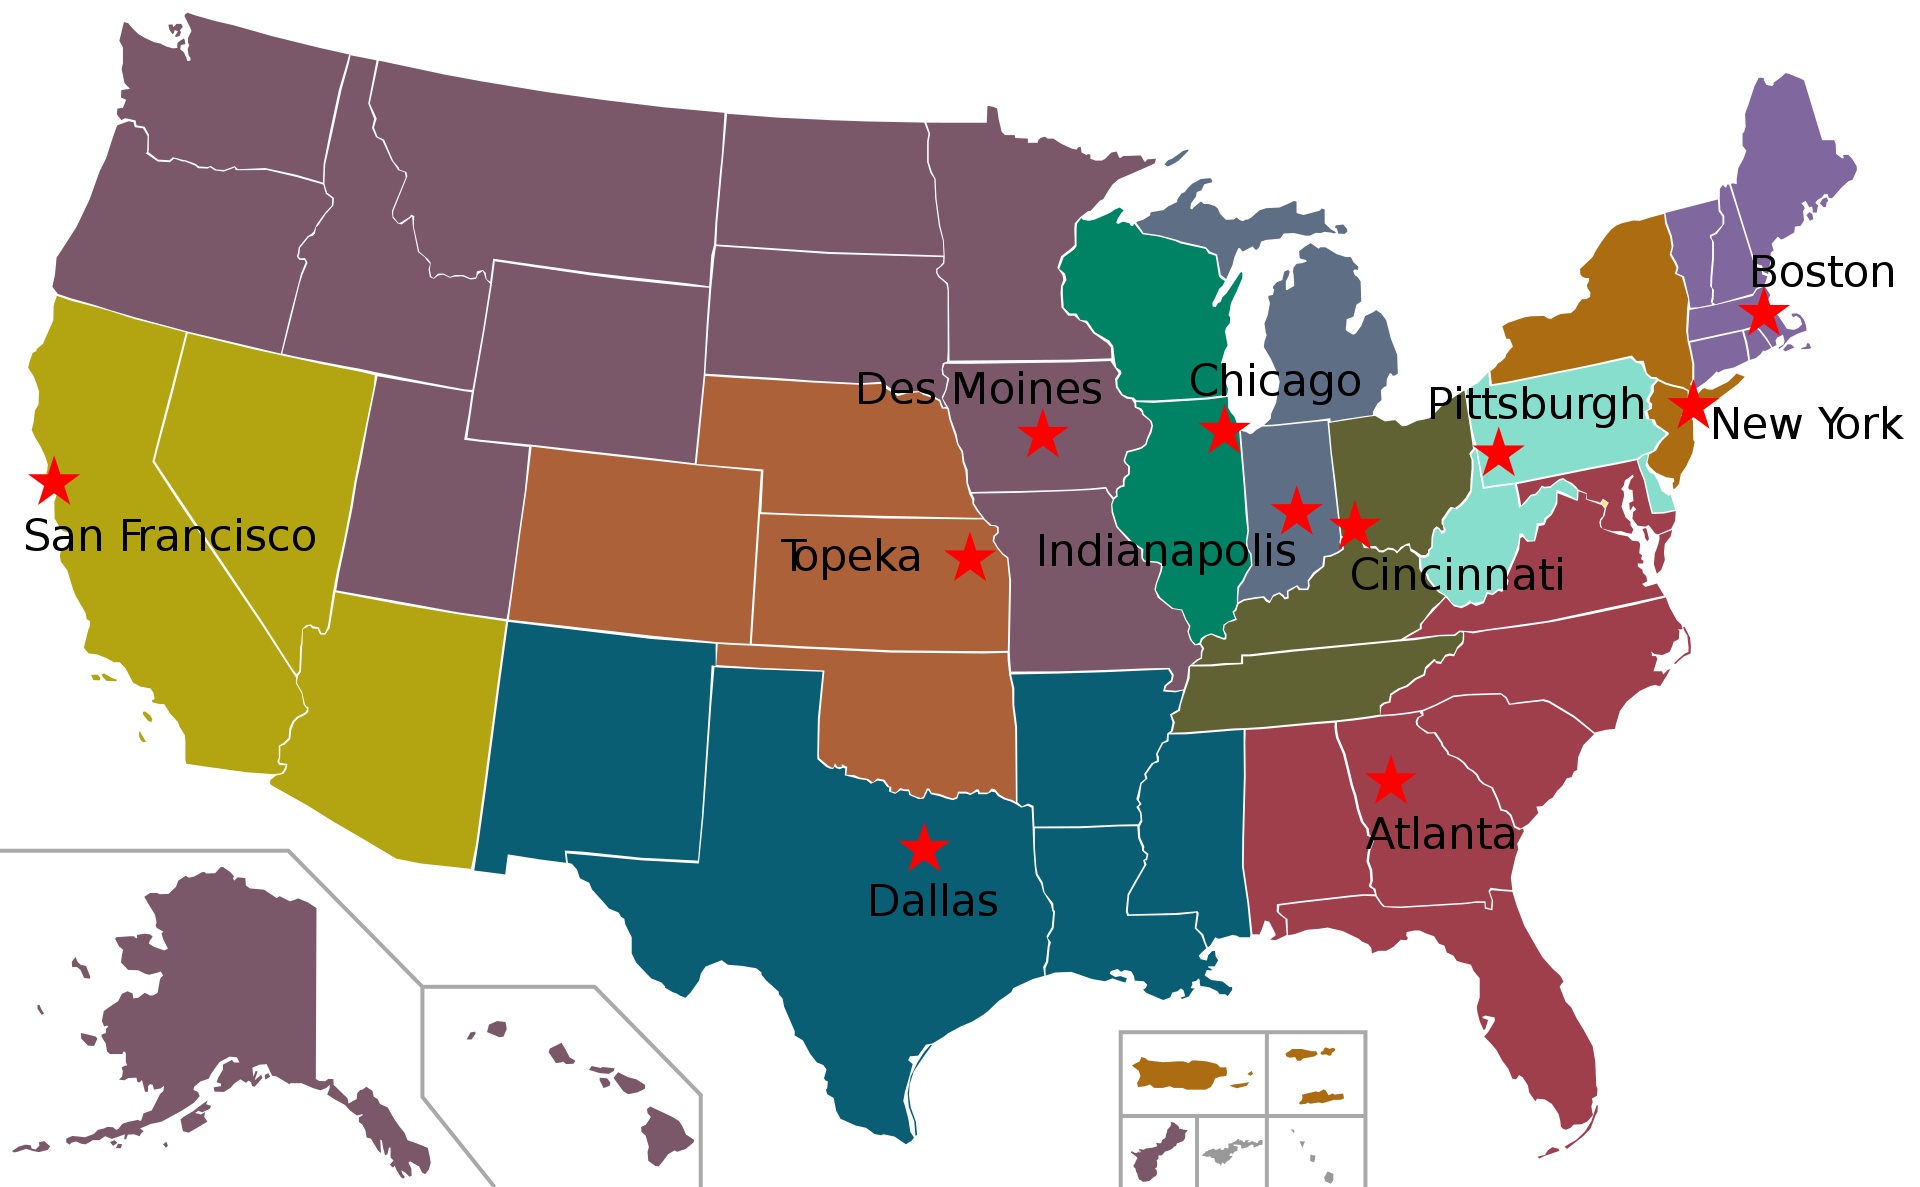

In [2]:
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/FHLB_territory_map.svg/1920px-FHLB_territory_map.svg.png')

- FHLB 지도 (출처 : 위키백과)

## 1. 데이터 탐색

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')

In [4]:
data_fhlb = pd.read_csv('C:/Users/chell/Downloads/fhlb_members.csv')

In [5]:
data_fhlb.head()

,fhfb_id,district,member_name,city,state,zip,mem_type,char_type,cert,fed_id,ots_id,ncua_id,appr_date
0,7,Atlanta,Piedmont FS and LA,Winston Salem,NC,27101,Savings and Loan,Federal,27619.0,NaN,7.0,NaN,NaN
1,16,Dallas,State-Investors Bank,Metairie,LA,70005,Savings and Loan,Federal,27626.0,NaN,16.0,NaN,NaN
2,41,Cincinnati,First Federal Bank of Ohio,Galion,OH,44833,Savings and Loan,Federal,27643.0,NaN,41.0,NaN,NaN
3,57,Dallas,Home Federal Bank,Shreveport,LA,71101,Savings and Loan,Federal,27654.0,NaN,57.0,NaN,NaN
4,73,Chicago,"Sterling Federal Bank, F.S.B.",Sterling,IL,61081,Savings and Loan,Federal,27664.0,NaN,73.0,NaN,NaN


In [6]:
data_fhlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7462 entries, 0 to 7461
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fhfb_id      7462 non-null   int64  
 1   district     7462 non-null   object 
 2   member_name  7462 non-null   object 
 3   city         7462 non-null   object 
 4   state        7462 non-null   object 
 5   zip          7462 non-null   int64  
 6   mem_type     7462 non-null   object 
 7   char_type    7462 non-null   object 
 8   cert         5921 non-null   float64
 9   fed_id       5372 non-null   float64
 10  ots_id       549 non-null    float64
 11  ncua_id      1233 non-null   float64
 12  appr_date    6649 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 758.0+ KB


In [7]:
data_fhlb.isna().sum()

fhfb_id           0
district          0
member_name       0
city              0
state             0
zip               0
mem_type          0
char_type         0
cert           1541
fed_id         2090
ots_id         6913
ncua_id        6229
appr_date       813
dtype: int64

In [8]:
data_fb = data_fhlb.copy()

- id들(fhfb_id, fed_id, ots_id, ncua_id)은 크게 의미가 있는 변수가 아니라고 판단해서 null값을 채우는 대신 삭제
- 같은 이유로 zip(우편번호), cert(인증번호)도 삭제
- member_name, city는 변수 종류가 너무 많아서 삭제(분석할 때 가변수화를 하면 지나치게 많아질 것이라서)

In [9]:
col_d = ['fhfb_id', 'fed_id', 'ots_id', 'ncua_id', 'member_name', 'city', 'zip', 'cert']
data_fb = data_fb.drop(col_d, axis=1)

In [10]:
data_fb.columns

Index(['district', 'state', 'mem_type', 'char_type', 'appr_date'], dtype='object')

- 가입일(appr_data)의 결측치는 최빈값으로 채우기

In [11]:
data_fb['appr_date'].value_counts()

12apr2000    13
29apr1992    11
01apr1999    11
30dec1991    11
01aug1994    11
             ..
14aug2009     1
29sep2011     1
20apr1994     1
25aug2000     1
15jul2002     1
Name: appr_date, Length: 3171, dtype: int64

In [12]:
fre_apprd = data_fb['appr_date'].value_counts().idxmax()
data_fb = data_fb.fillna(fre_apprd)

In [13]:
data_fb.isna().sum()

district     0
state        0
mem_type     0
char_type    0
appr_date    0
dtype: int64

In [14]:
data_fb['appr_date']

0       12apr2000
1       12apr2000
2       12apr2000
3       12apr2000
4       12apr2000
          ...    
7457    06mar2014
7458    07mar2014
7459    17mar2014
7460    18mar2014
7461    20mar2014
Name: appr_date, Length: 7462, dtype: object

In [15]:
data_fb['appr_date'].value_counts()

12apr2000    826
29apr1992     11
01apr1999     11
30dec1991     11
01aug1994     11
            ... 
14aug2009      1
29sep2011      1
20apr1994      1
25aug2000      1
15jul2002      1
Name: appr_date, Length: 3171, dtype: int64

- 결측치를 최빈값으로 채워서 12apr2000가 가장 많이 나옴
- 가입일(appr_date)에 문자도 섞여있어서 날짜 데이터를 분리하는 데 어려움이 있어 결측치만 한 번 채워보고 머신러닝 등에 사용하지 않음. 그리고 가입일 변수가 모델링에 큰 영향을 주지 않을 것이라고 생각했음

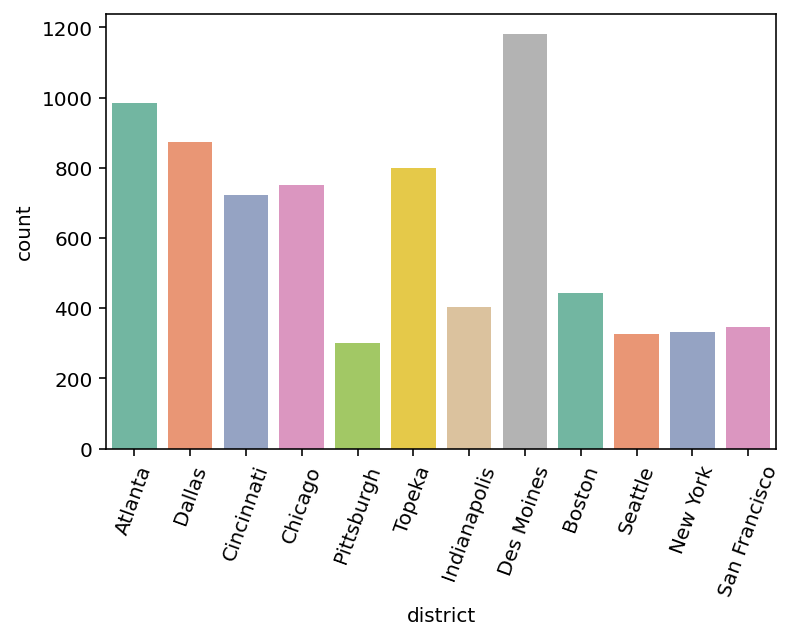

In [16]:
sns.countplot(data_fb['district'], palette='Set2')
plt.xticks(rotation=70)
plt.show()

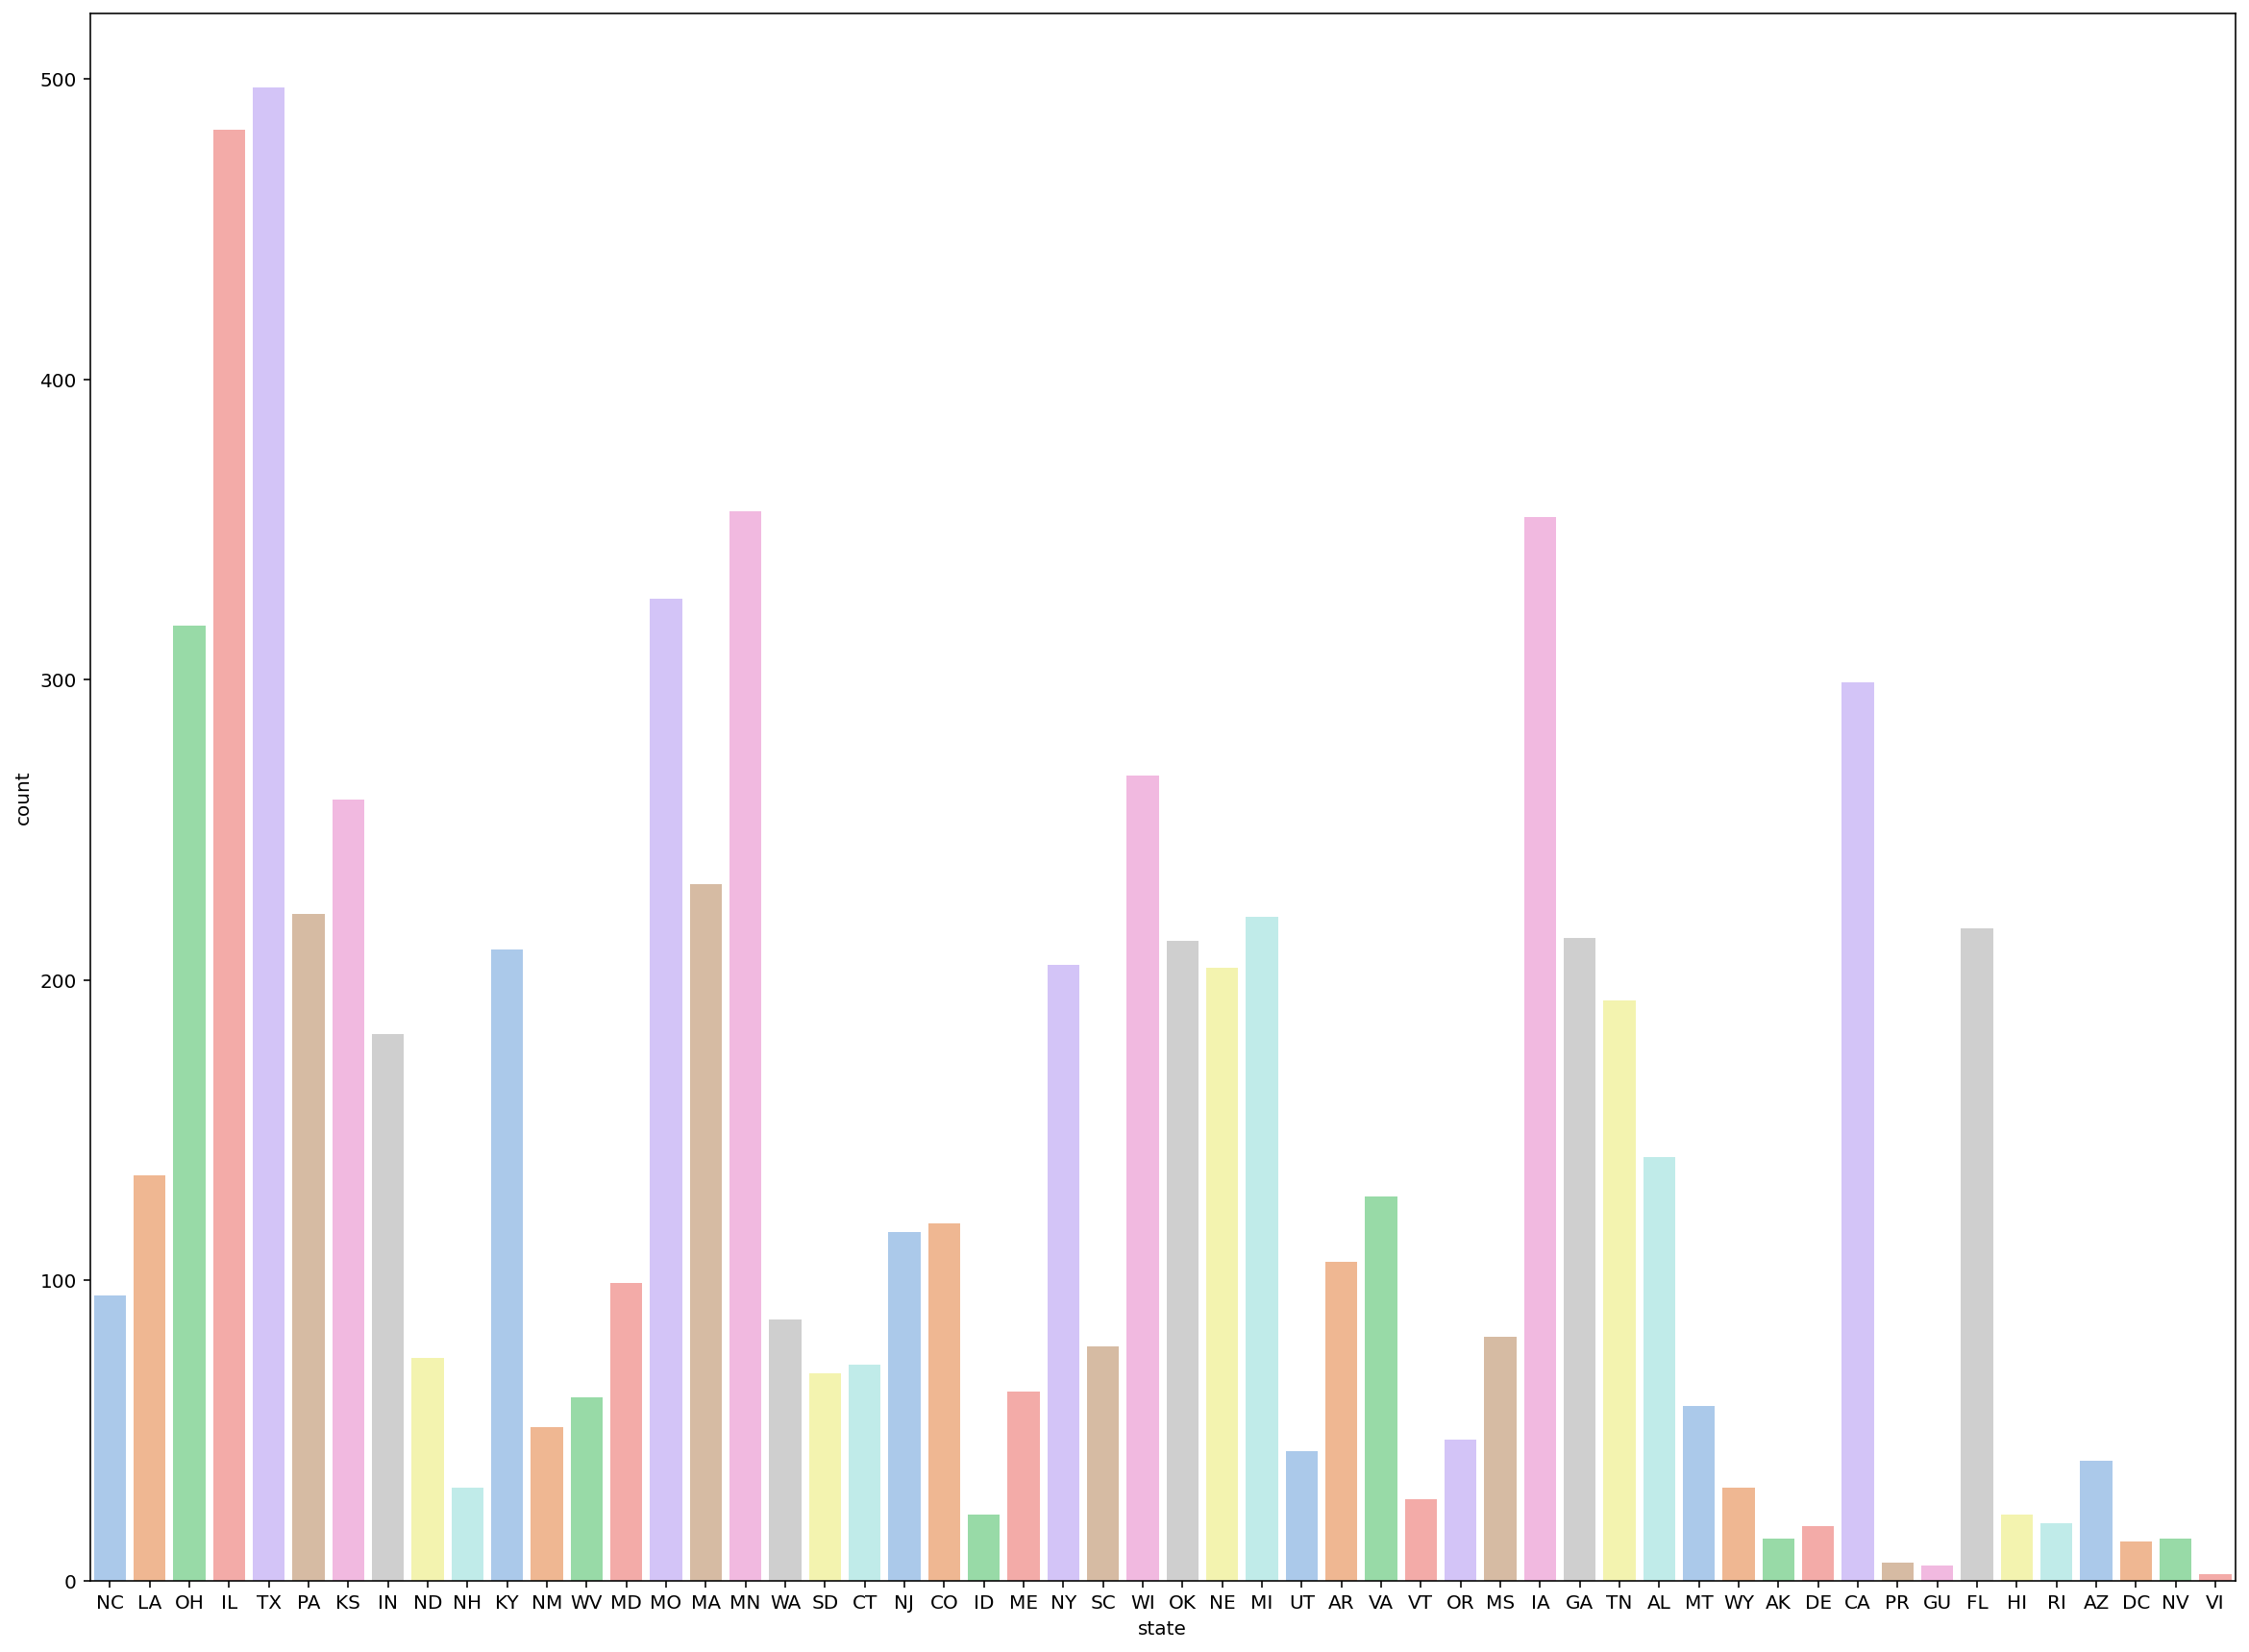

In [17]:
plt.figure(figsize=(20, 15))
sns.countplot(data_fb['state'], palette='pastel')
plt.show()

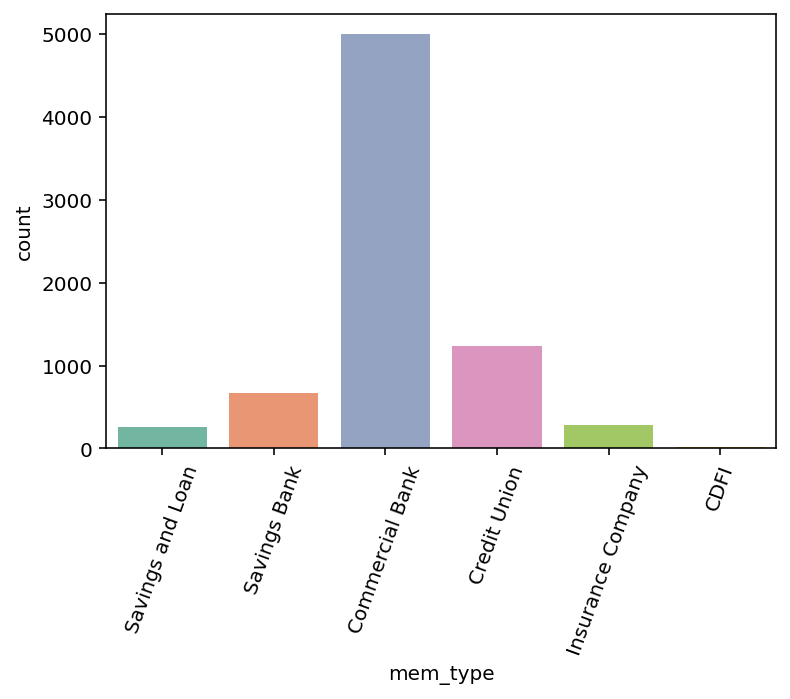

In [18]:
sns.countplot(data_fb['mem_type'], palette='Set2')
plt.xticks(rotation=70)
plt.show()

In [19]:
data_fb['mem_type'].value_counts()

Commercial Bank      4998
Credit Union         1233
Savings Bank          668
Insurance Company     286
Savings and Loan      255
CDFI                   22
Name: mem_type, dtype: int64

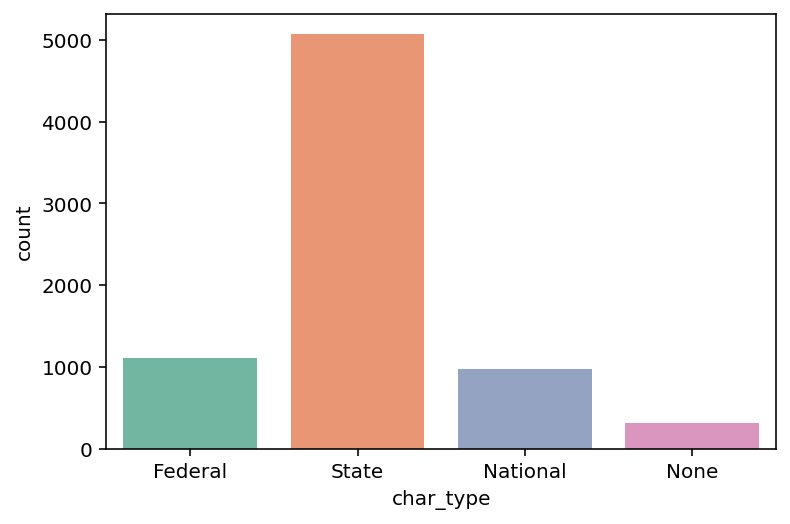

In [20]:
sns.countplot(data_fb['char_type'], palette='Set2')
plt.show()

In [21]:
pd.crosstab(data_fb['char_type'], data_fb['district'])

district,Atlanta,Boston,Chicago,Cincinnati,Dallas,Des Moines,Indianapolis,New York,Pittsburgh,San Francisco,Seattle,Topeka
char_type,,,,,,,,,,,,
Federal,201,115,58,123,91,74,79,116,55,61,79,61
National,111,23,118,85,201,129,28,46,38,41,20,134
None,19,27,28,41,32,54,51,9,8,10,4,25
State,653,278,548,474,549,923,246,160,199,235,224,578


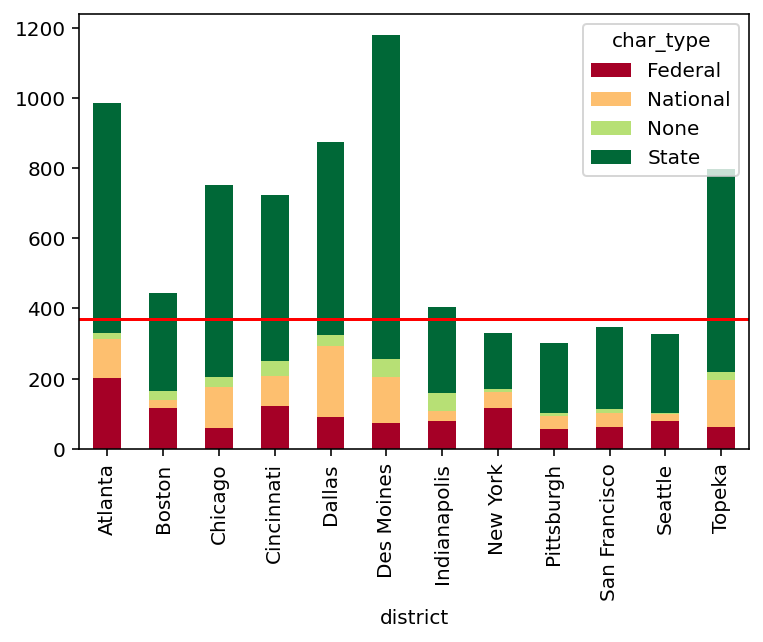

In [22]:
t1 = pd.crosstab(data_fb['district'], data_fb['char_type'])
t1.plot.bar(stacked=True, cmap='RdYlGn')
plt.axhline(370, color='r')
plt.show()

In [23]:
pd.crosstab(data_fb['char_type'], data_fb['state'])

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
char_type,,,,,,,,,,,,,,,,,,,,,
Federal,8,12,5,5,55,16,27,9,3,33,...,23,45,14,33,0,5,10,17,11,8
National,1,13,22,8,33,15,6,2,5,41,...,15,153,3,18,0,5,5,28,6,4
None,0,1,0,7,6,1,5,0,3,4,...,4,21,2,4,0,7,0,7,0,0
State,5,115,79,20,205,87,34,2,7,139,...,151,278,24,73,2,10,72,216,44,19


- state의 값이 너무 많아 stacked plot을 그리면 너무 복잡하게 나오므로 생략.

In [24]:
pd.crosstab(data_fb['char_type'], data_fb['mem_type'])

mem_type,CDFI,Commercial Bank,Credit Union,Insurance Company,Savings Bank,Savings and Loan
char_type,,,,,,
Federal,0,0,631,0,294,188
National,0,974,0,0,0,0
None,22,0,0,286,0,0
State,0,4024,602,0,374,67


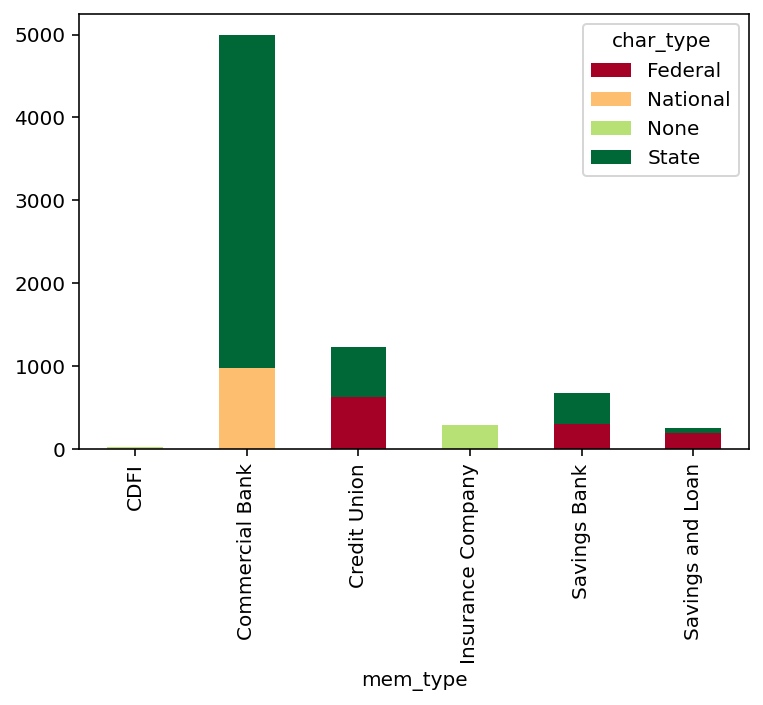

In [25]:
t1 = pd.crosstab(data_fb['mem_type'], data_fb['char_type'])
t1.plot.bar(stacked=True, cmap='RdYlGn')
plt.show()

- CDFI는 변수 개수가 너무 작아 그래프가 안 나옴

## 2. 데이터 전처리

- target = char_type(가입 유형)

In [26]:
x = data_fb.drop(['char_type', 'appr_date'], axis=1)
y = data_fb['char_type']

In [27]:
x.shape, y.shape

((7462, 3), (7462,))

In [28]:
dum_col = ['district', 'state', 'mem_type']
x = pd.get_dummies(x, columns=dum_col)

In [29]:
x.shape, y.shape

((7462, 72), (7462,))

In [30]:
# 오버샘플링
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2022)
x, y = smote.fit_resample(x, y)

- 데이터가 불균형하여 오버샘플링을 진행함

## 3. Machine Learning (Multiclass Classification)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

### 1) Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
model_dt = DecisionTreeClassifier(max_depth=20,
                                  max_features=10,
                                  min_samples_leaf=2,
                                  random_state=2022)

In [37]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, max_features=10, min_samples_leaf=2,
                       random_state=2022)

In [38]:
y_pred = model_dt.predict(x_test)

In [39]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('cross validation score :', cross_val_score(model_dt, x_train, y_train, scoring='accuracy'))

[[ 942    0    2   16]
 [   0  868    0  181]
 [   0    0 1008    0]
 [ 160  494    0  383]]
              precision    recall  f1-score   support

     Federal       0.85      0.98      0.91       960
    National       0.64      0.83      0.72      1049
        None       1.00      1.00      1.00      1008
       State       0.66      0.37      0.47      1037

    accuracy                           0.79      4054
   macro avg       0.79      0.79      0.78      4054
weighted avg       0.78      0.79      0.77      4054

cross validation score : [0.78476719 0.78970089 0.79062596 0.7662658  0.77945713]


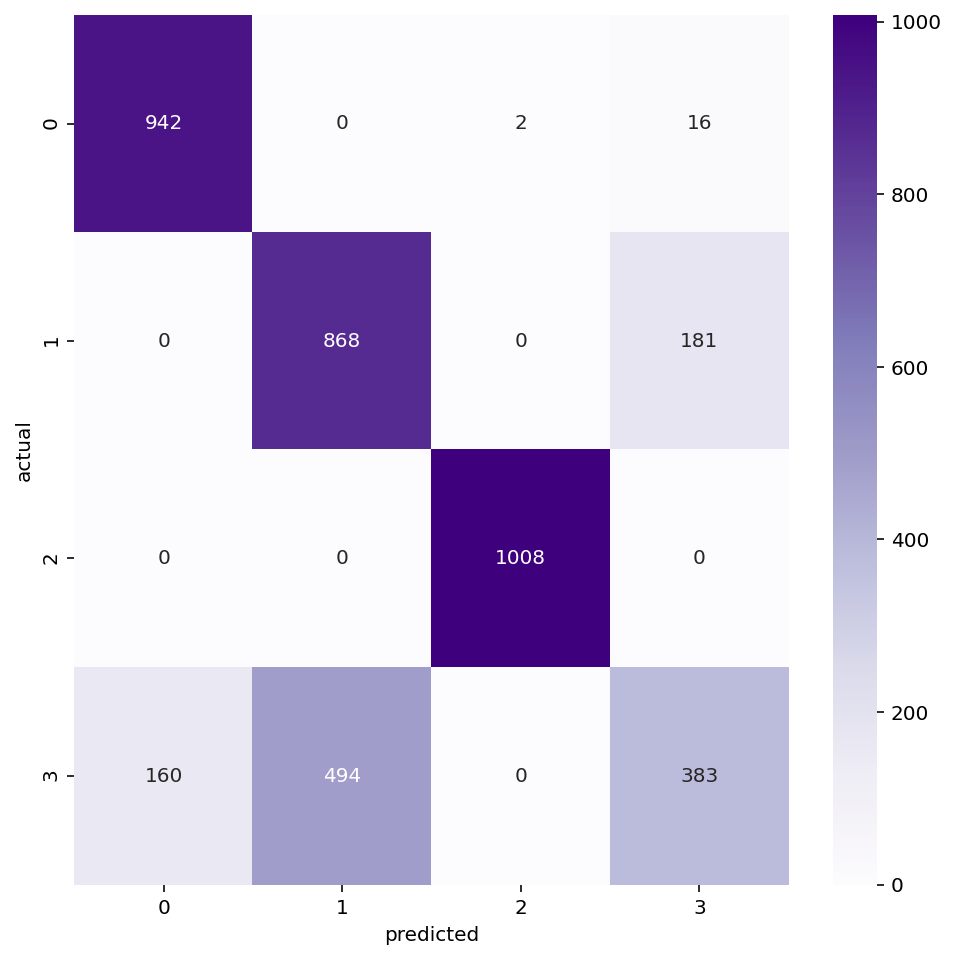

In [40]:
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Purples')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [41]:
from sklearn import tree
from sklearn.tree import plot_tree

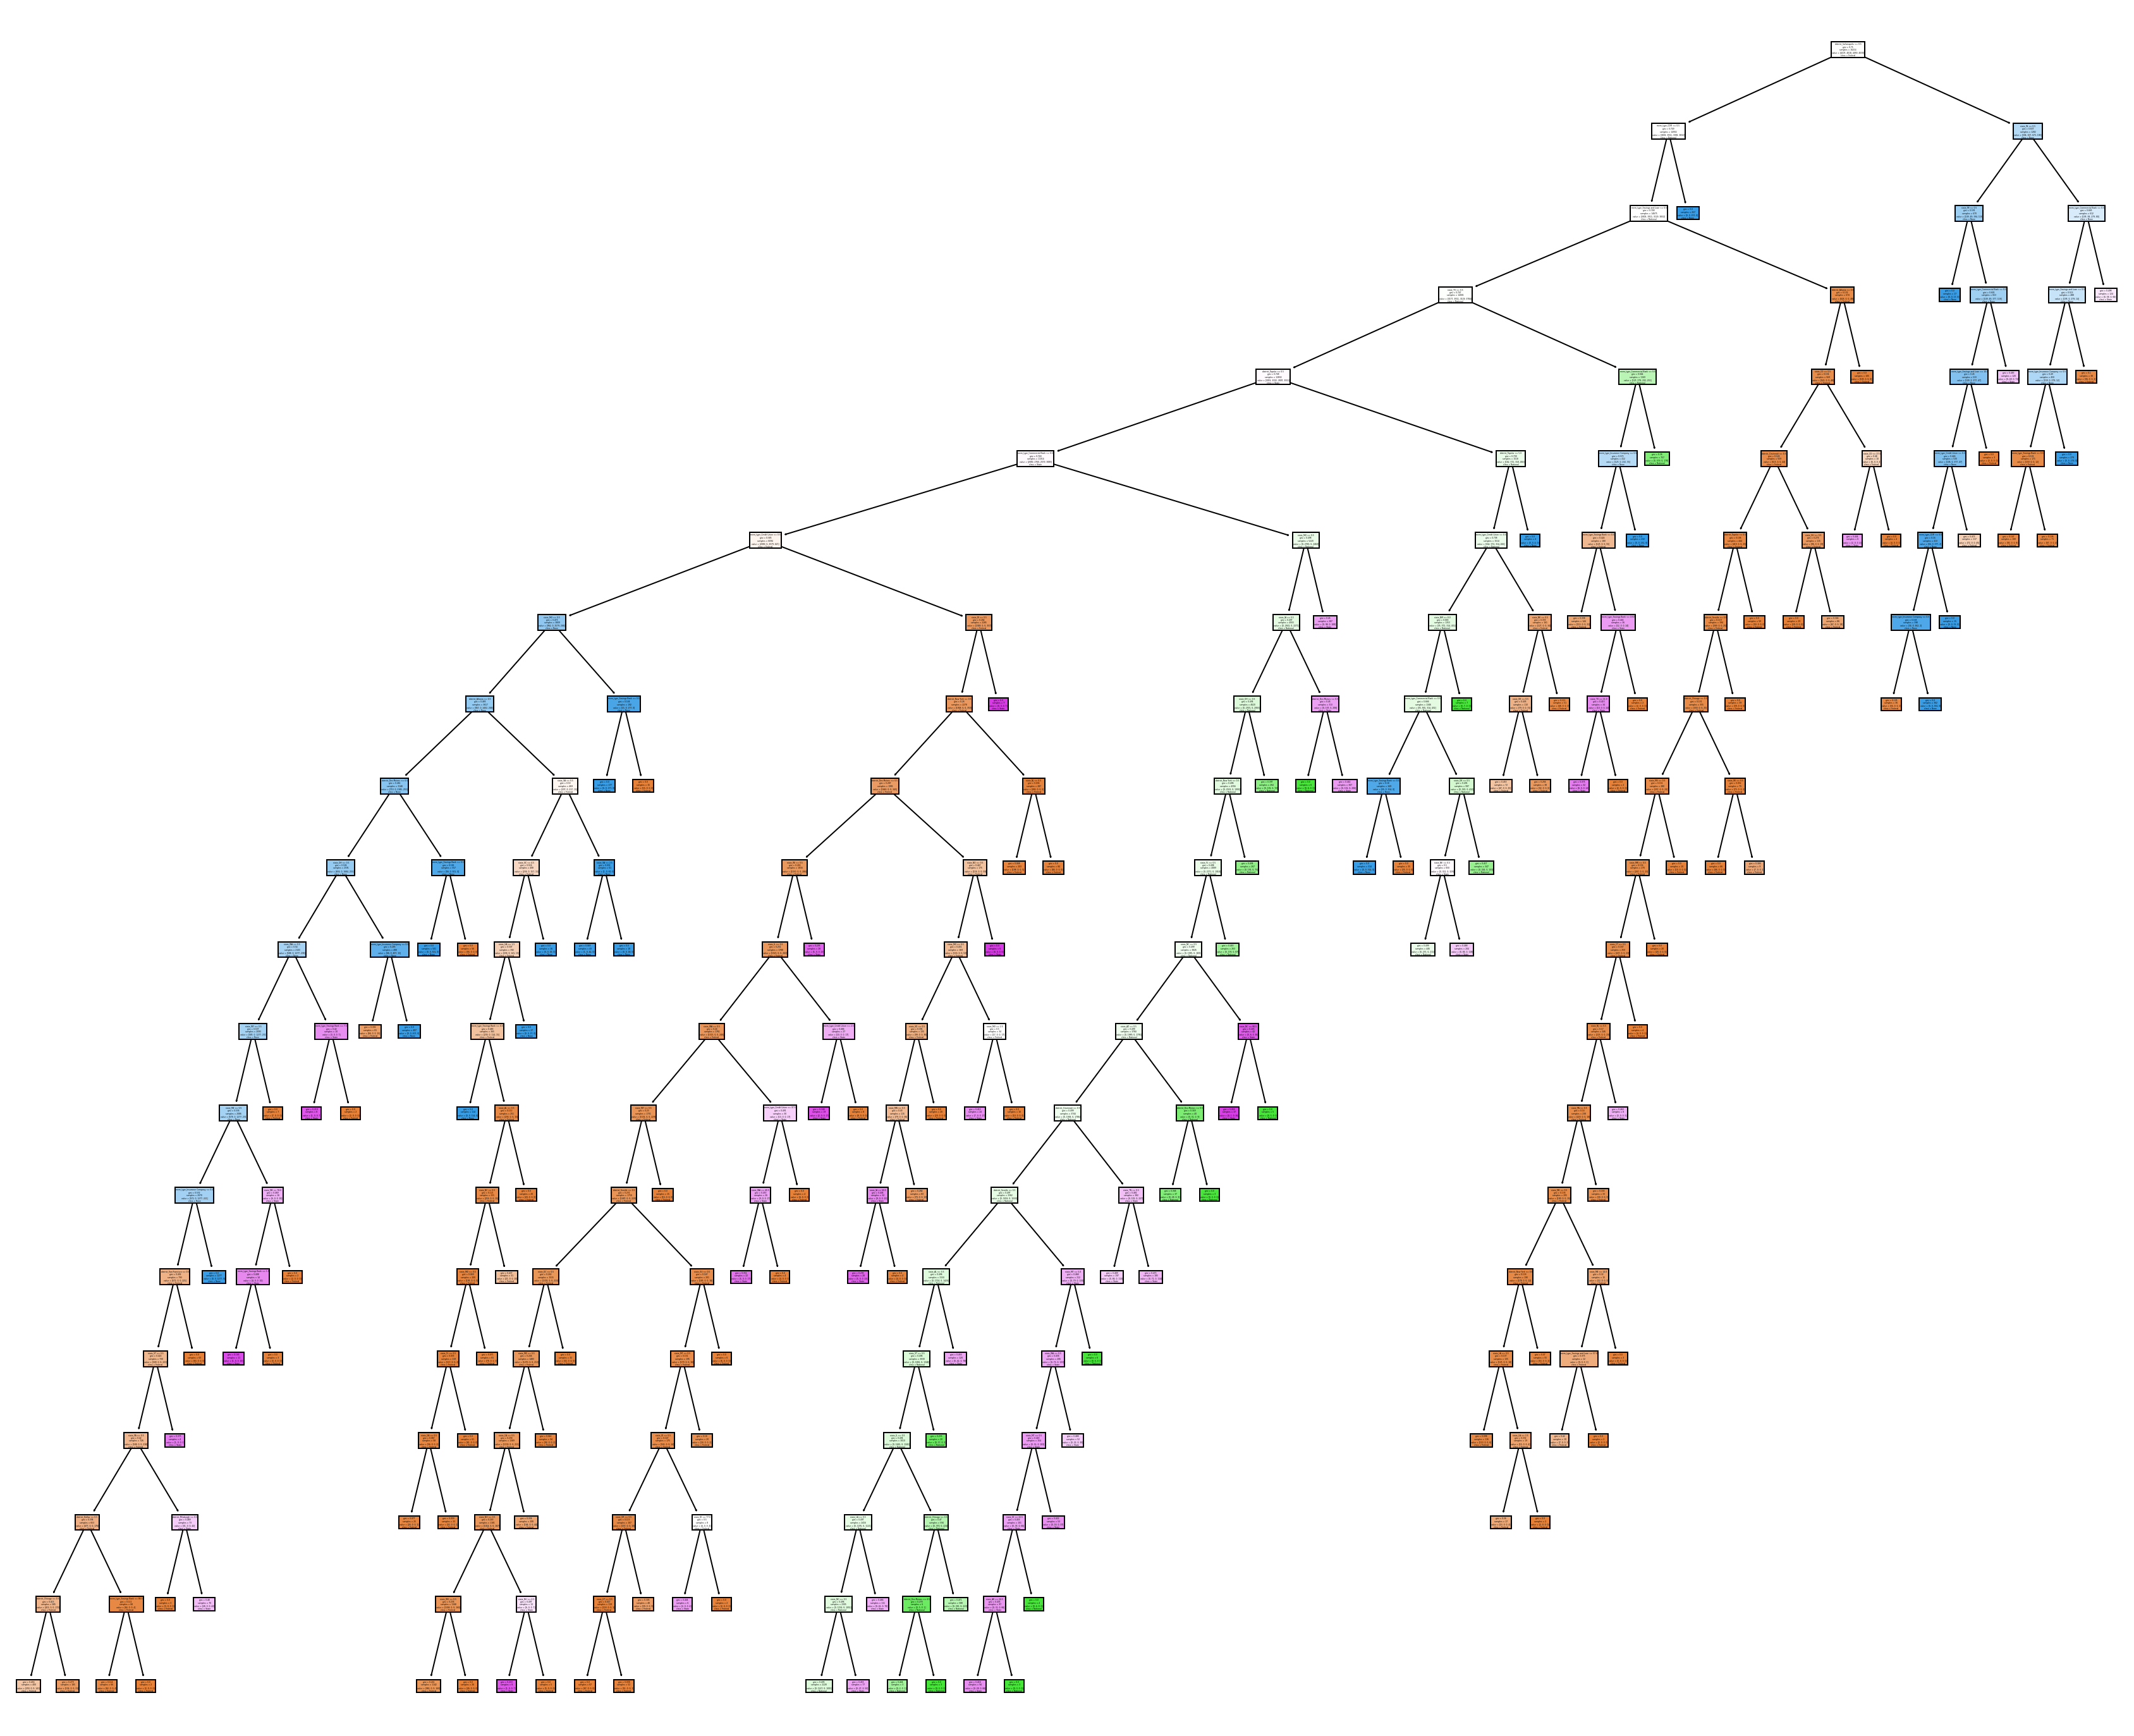

In [42]:
plt.figure(figsize=(30, 25))
mytree = tree.plot_tree(model_dt,
                        feature_names=x.columns,
                        class_names=['Federal', 'National', 'None', 'State'],
                        filled=True)

- decision tree의 박스 글자가 잘 안보임. 대강 이런 구조구나 정도로만 보기를 권장

In [43]:
score = {}
score['Decision_Tree'] = accuracy_score(y_test, y_pred)

In [44]:
iv = model_dt.feature_importances_
iv = pd.Series(iv, index=x_train.columns)
iv = iv.sort_values(ascending=False)

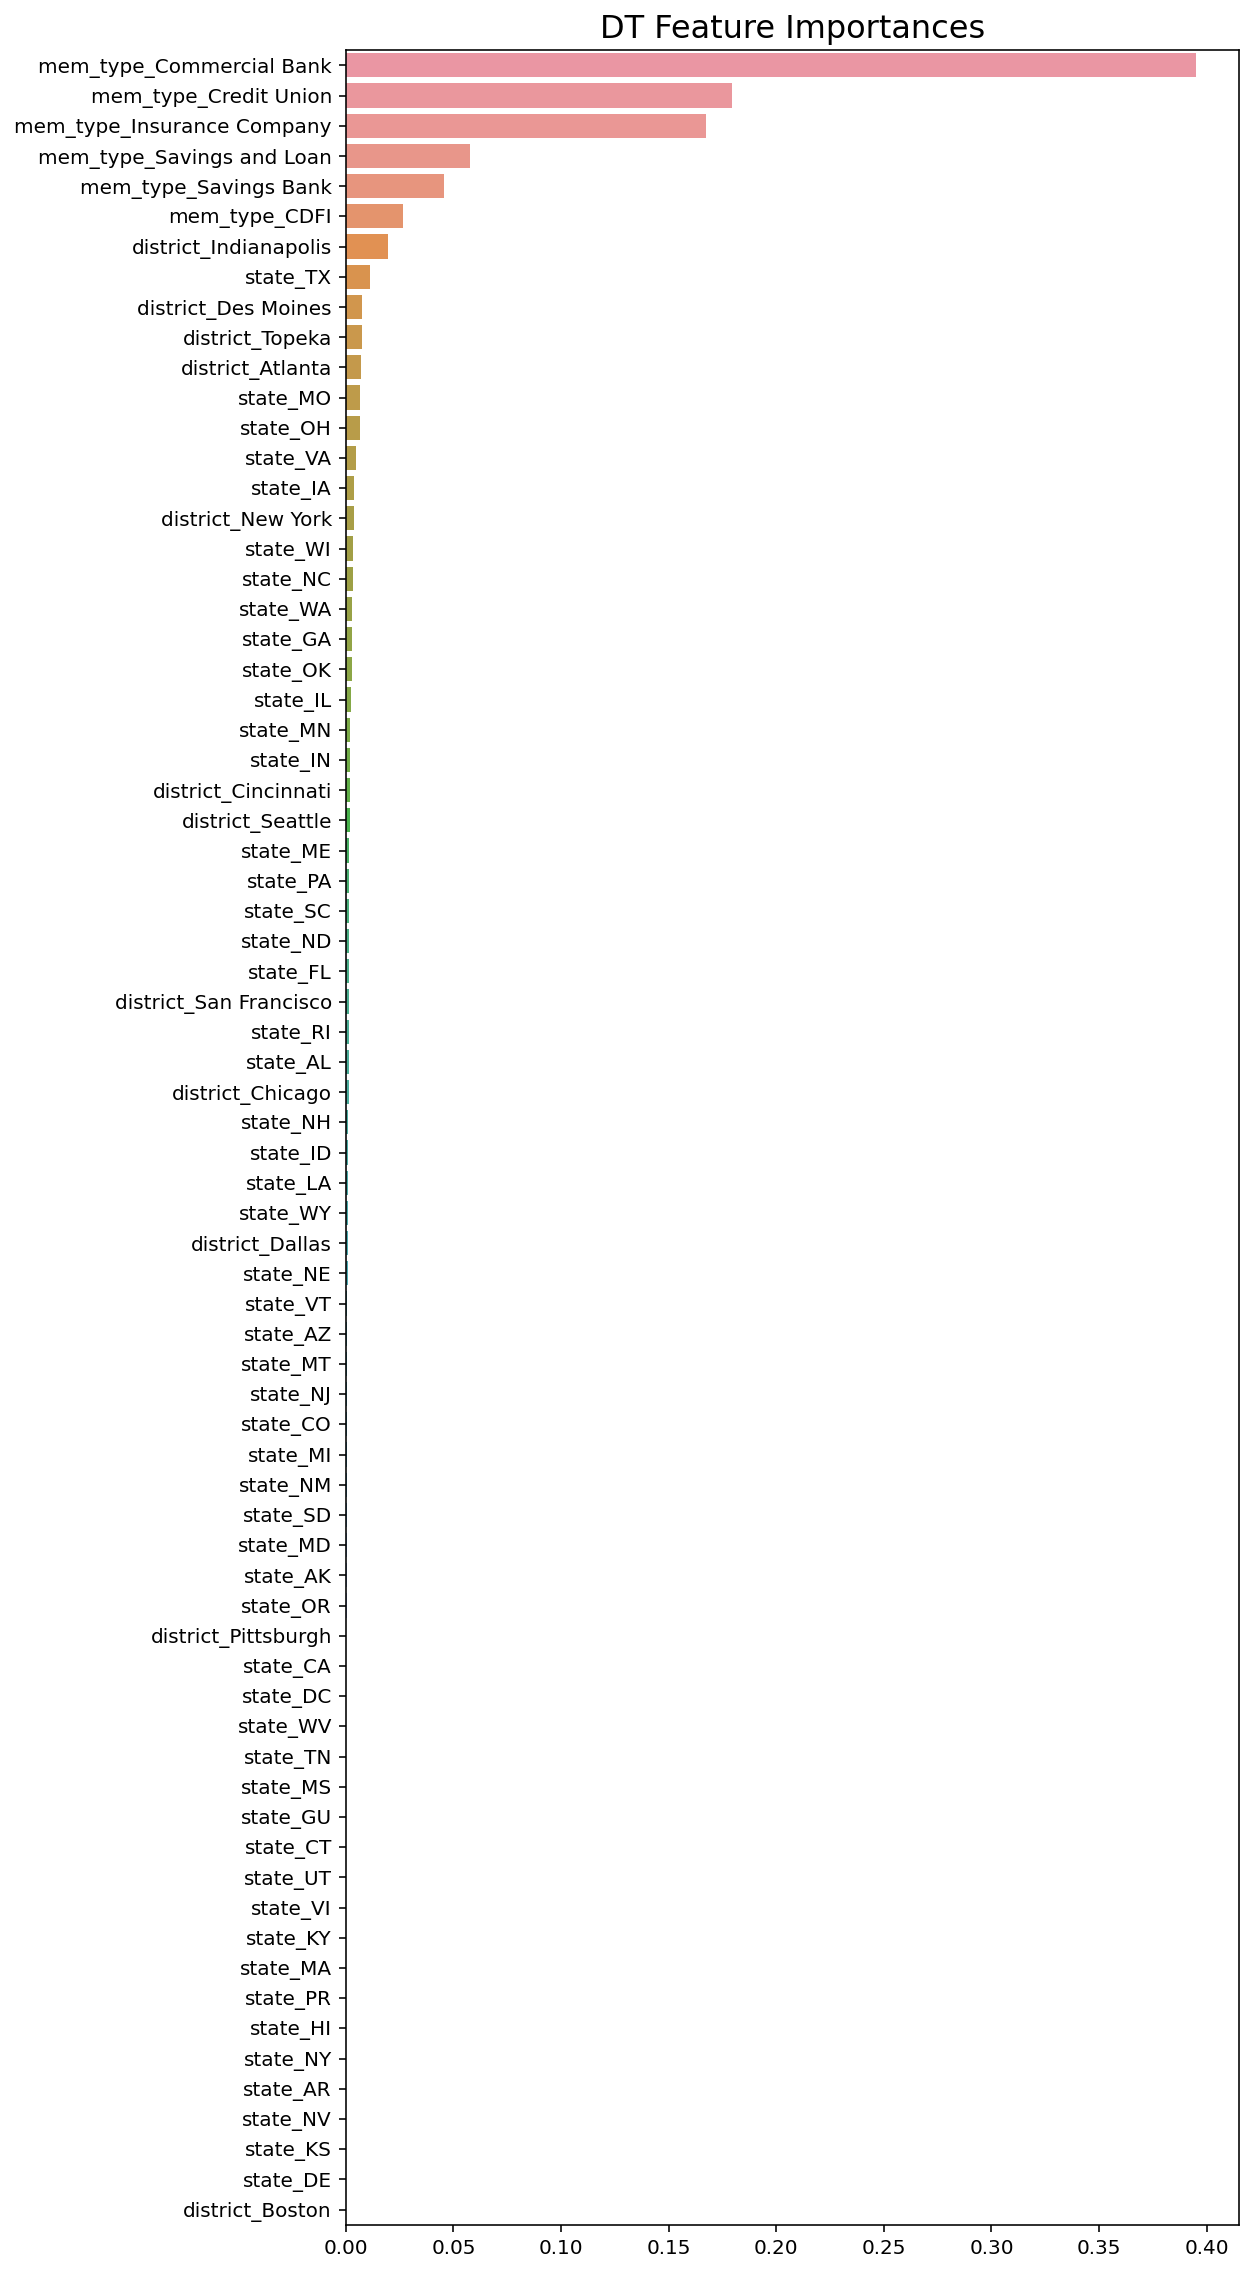

In [45]:
plt.figure(figsize=(8, 20))
plt.title('DT Feature Importances', fontsize=16)
sns.barplot(iv, iv.index)
plt.show()

### 2) AdaBoost

- RandomForest처럼 의사결정트리 기반 모델
- 머신러닝 알고리즘의 성능을 향상시키기 위해 사용(주로 DecisionTree와 같이 사용됨)

In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
model = AdaBoostClassifier(base_estimator=model_dt, 
                           n_estimators=100,
                           algorithm='SAMME.R',
                           random_state=2022)

In [48]:
model.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                         max_features=10,
                                                         min_samples_leaf=2,
                                                         random_state=2022),
                   n_estimators=100, random_state=2022)

In [49]:
y_pred = model.predict(x_test)

In [50]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('cross validation score :', cross_val_score(model, x_train, y_train, scoring='accuracy'))

[[ 760    0    0  200]
 [   0  889    0  160]
 [   0    0 1008    0]
 [ 135  624    0  278]]
              precision    recall  f1-score   support

     Federal       0.85      0.79      0.82       960
    National       0.59      0.85      0.69      1049
        None       1.00      1.00      1.00      1008
       State       0.44      0.27      0.33      1037

    accuracy                           0.72      4054
   macro avg       0.72      0.73      0.71      4054
weighted avg       0.71      0.72      0.71      4054

cross validation score : [0.77674992 0.67160037 0.68208449 0.75516497 0.72424429]


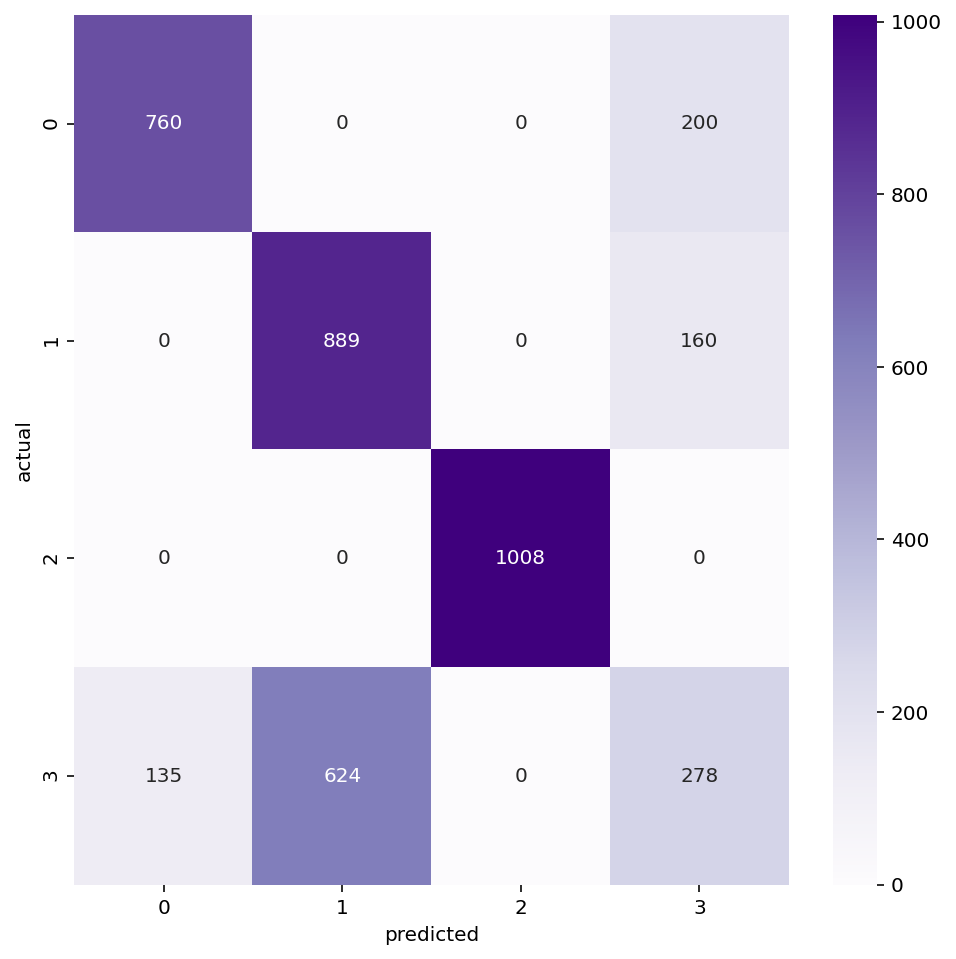

In [51]:
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Purples')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [52]:
iv = model.feature_importances_
iv = pd.Series(iv, index=x_train.columns)
iv = iv.sort_values(ascending=False)

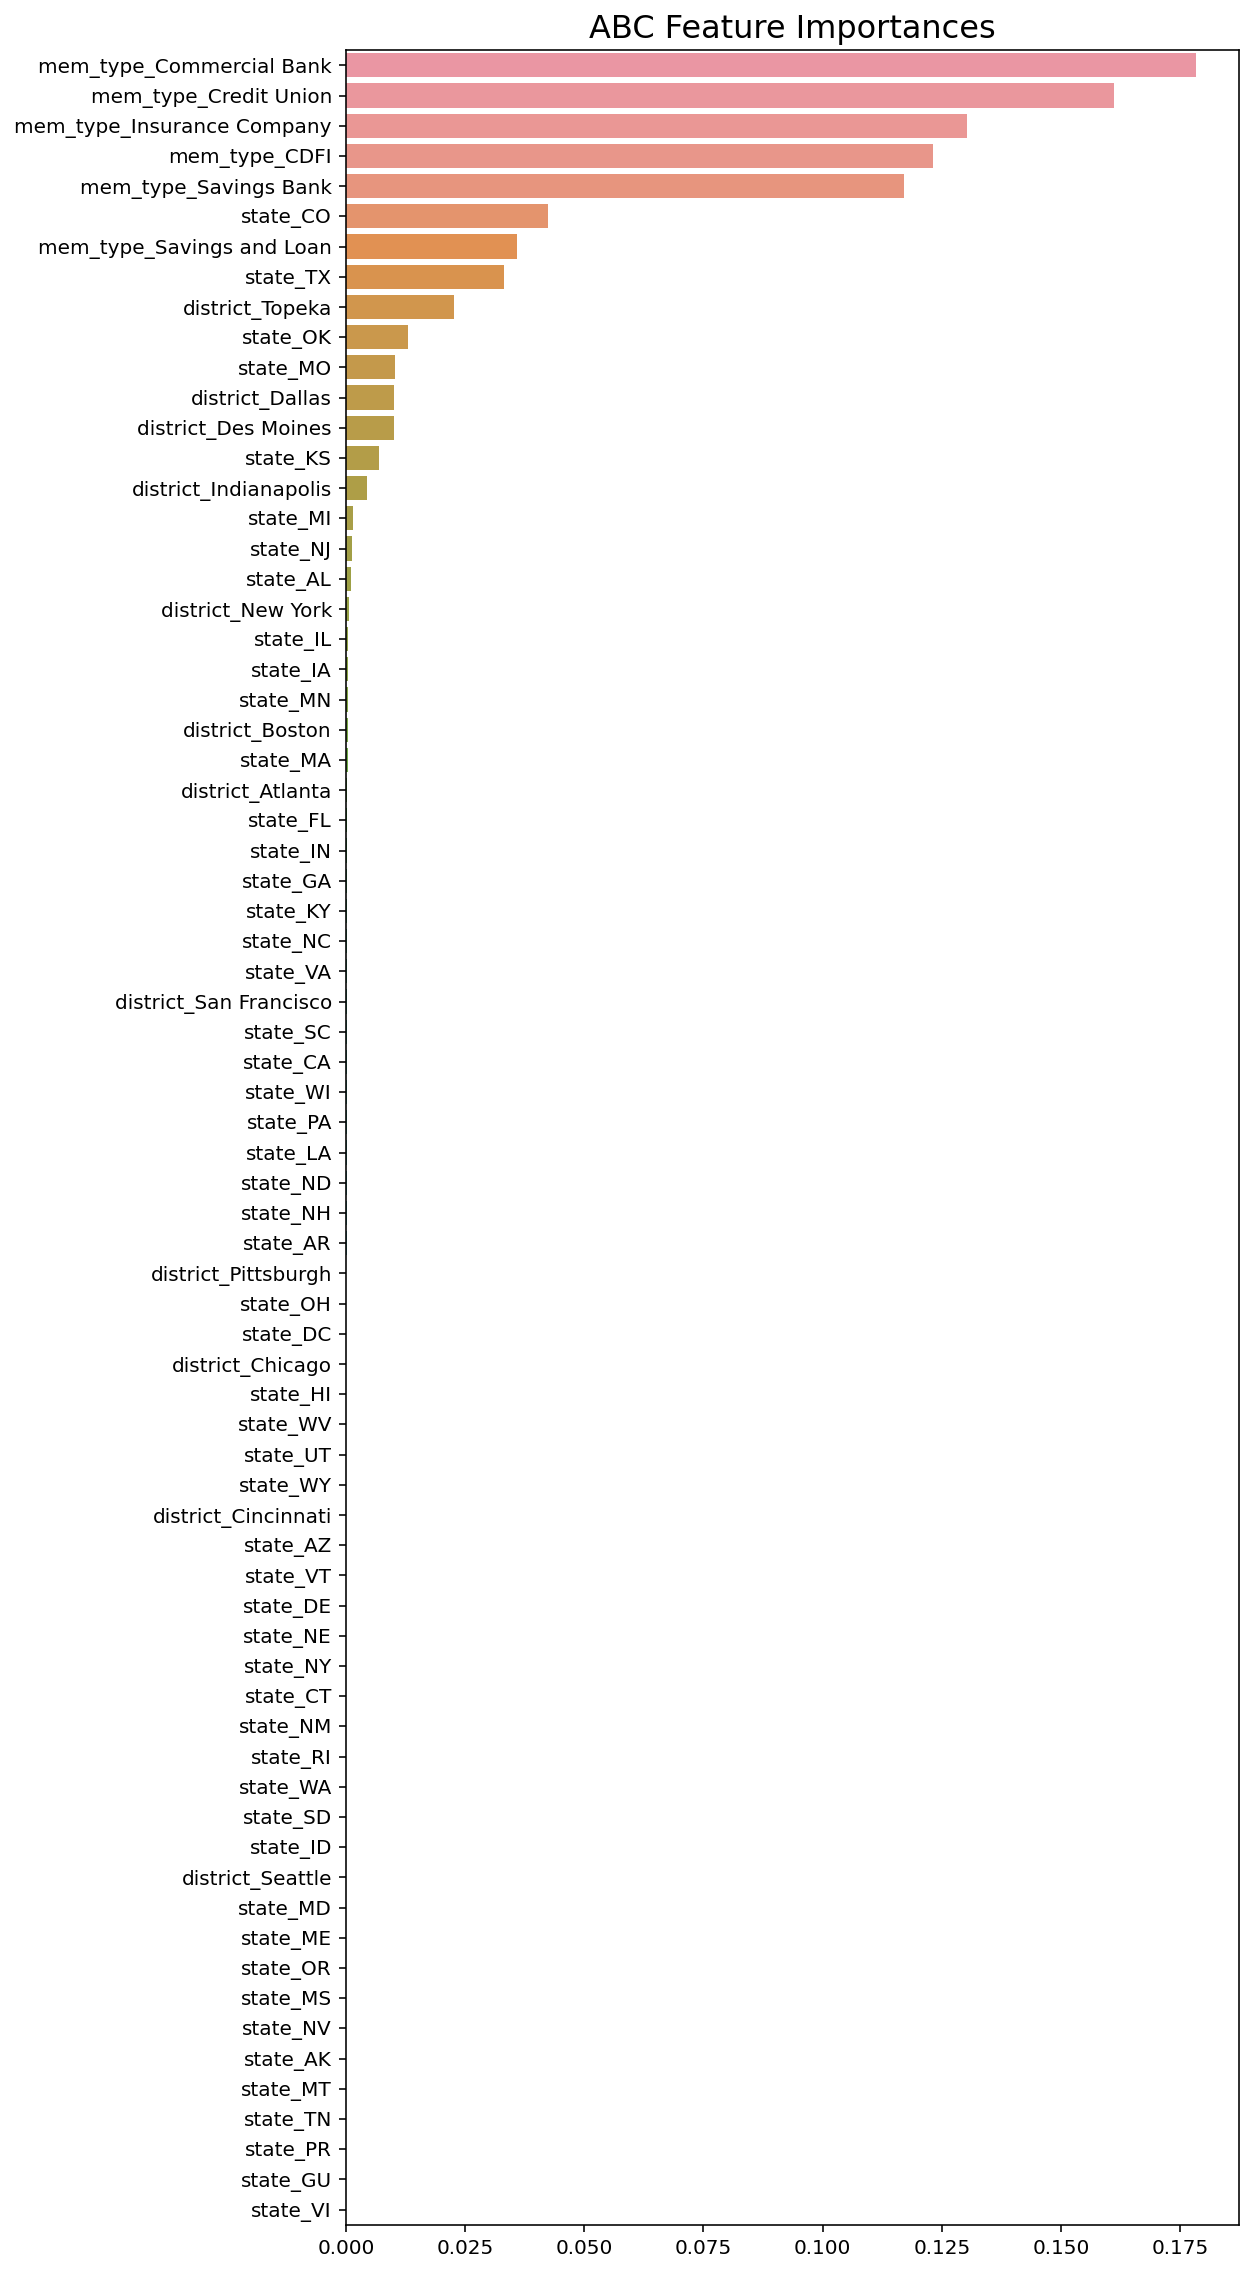

In [53]:
plt.figure(figsize=(8, 20))
plt.title('ABC Feature Importances', fontsize=16)
sns.barplot(iv, iv.index)
plt.show()

In [54]:
score['Ada_Boost'] = accuracy_score(y_test, y_pred)

### 3) Gradient Boosting

[GradientBoosting](https://en.wikipedia.org/wiki/Gradient_boosting)

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
model = GradientBoostingClassifier(learning_rate=0.5,
                                   max_depth=20,
                                   max_features=10,
                                   min_samples_leaf=2,
                                   random_state=2022)

In [57]:
model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=20, max_features=10,
                           min_samples_leaf=2, random_state=2022)

In [58]:
y_pred = model.predict(x_test)

In [59]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('cross validation score :', cross_val_score(model, x_train, y_train, scoring='accuracy'))

[[ 935    0    0   25]
 [   0  787    0  262]
 [   0    0 1008    0]
 [ 135  376    0  526]]
              precision    recall  f1-score   support

     Federal       0.87      0.97      0.92       960
    National       0.68      0.75      0.71      1049
        None       1.00      1.00      1.00      1008
       State       0.65      0.51      0.57      1037

    accuracy                           0.80      4054
   macro avg       0.80      0.81      0.80      4054
weighted avg       0.80      0.80      0.80      4054

cross validation score : [0.79802652 0.79401788 0.79679309 0.79710145 0.79395435]


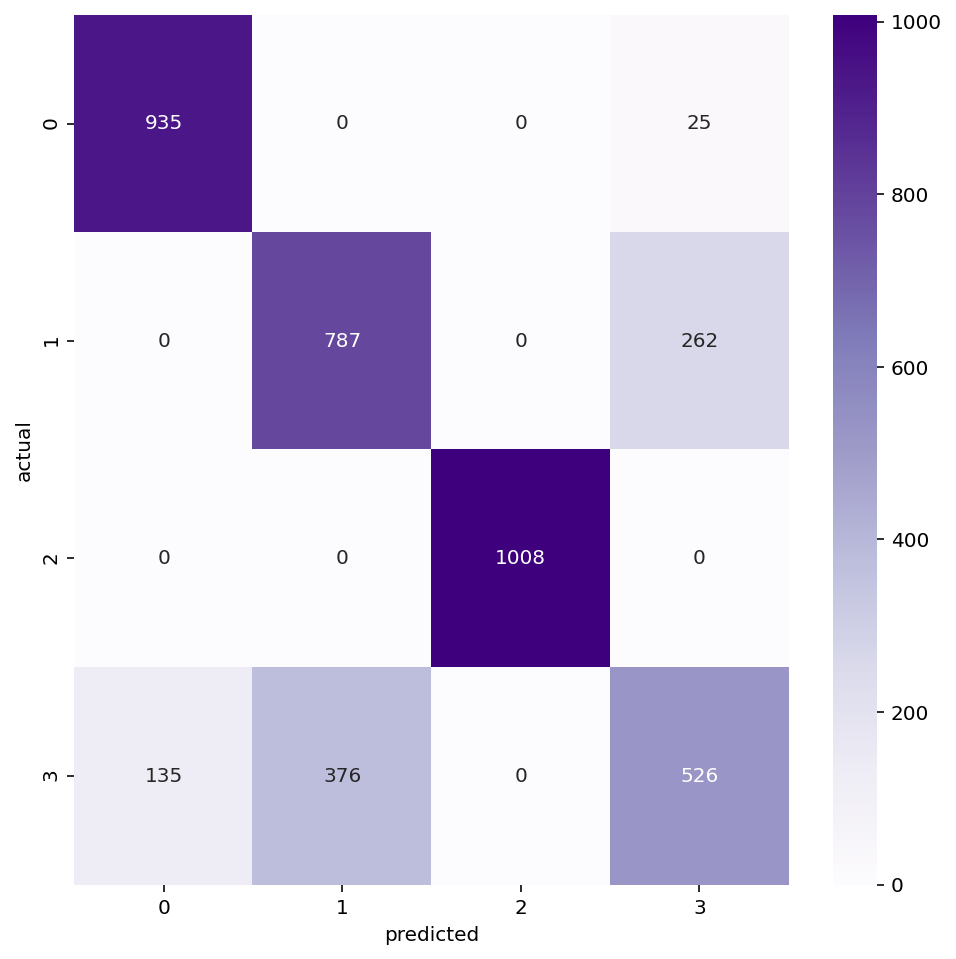

In [60]:
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Purples')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [61]:
iv = model.feature_importances_
iv = pd.Series(iv, index=x_train.columns)
iv = iv.sort_values(ascending=False)

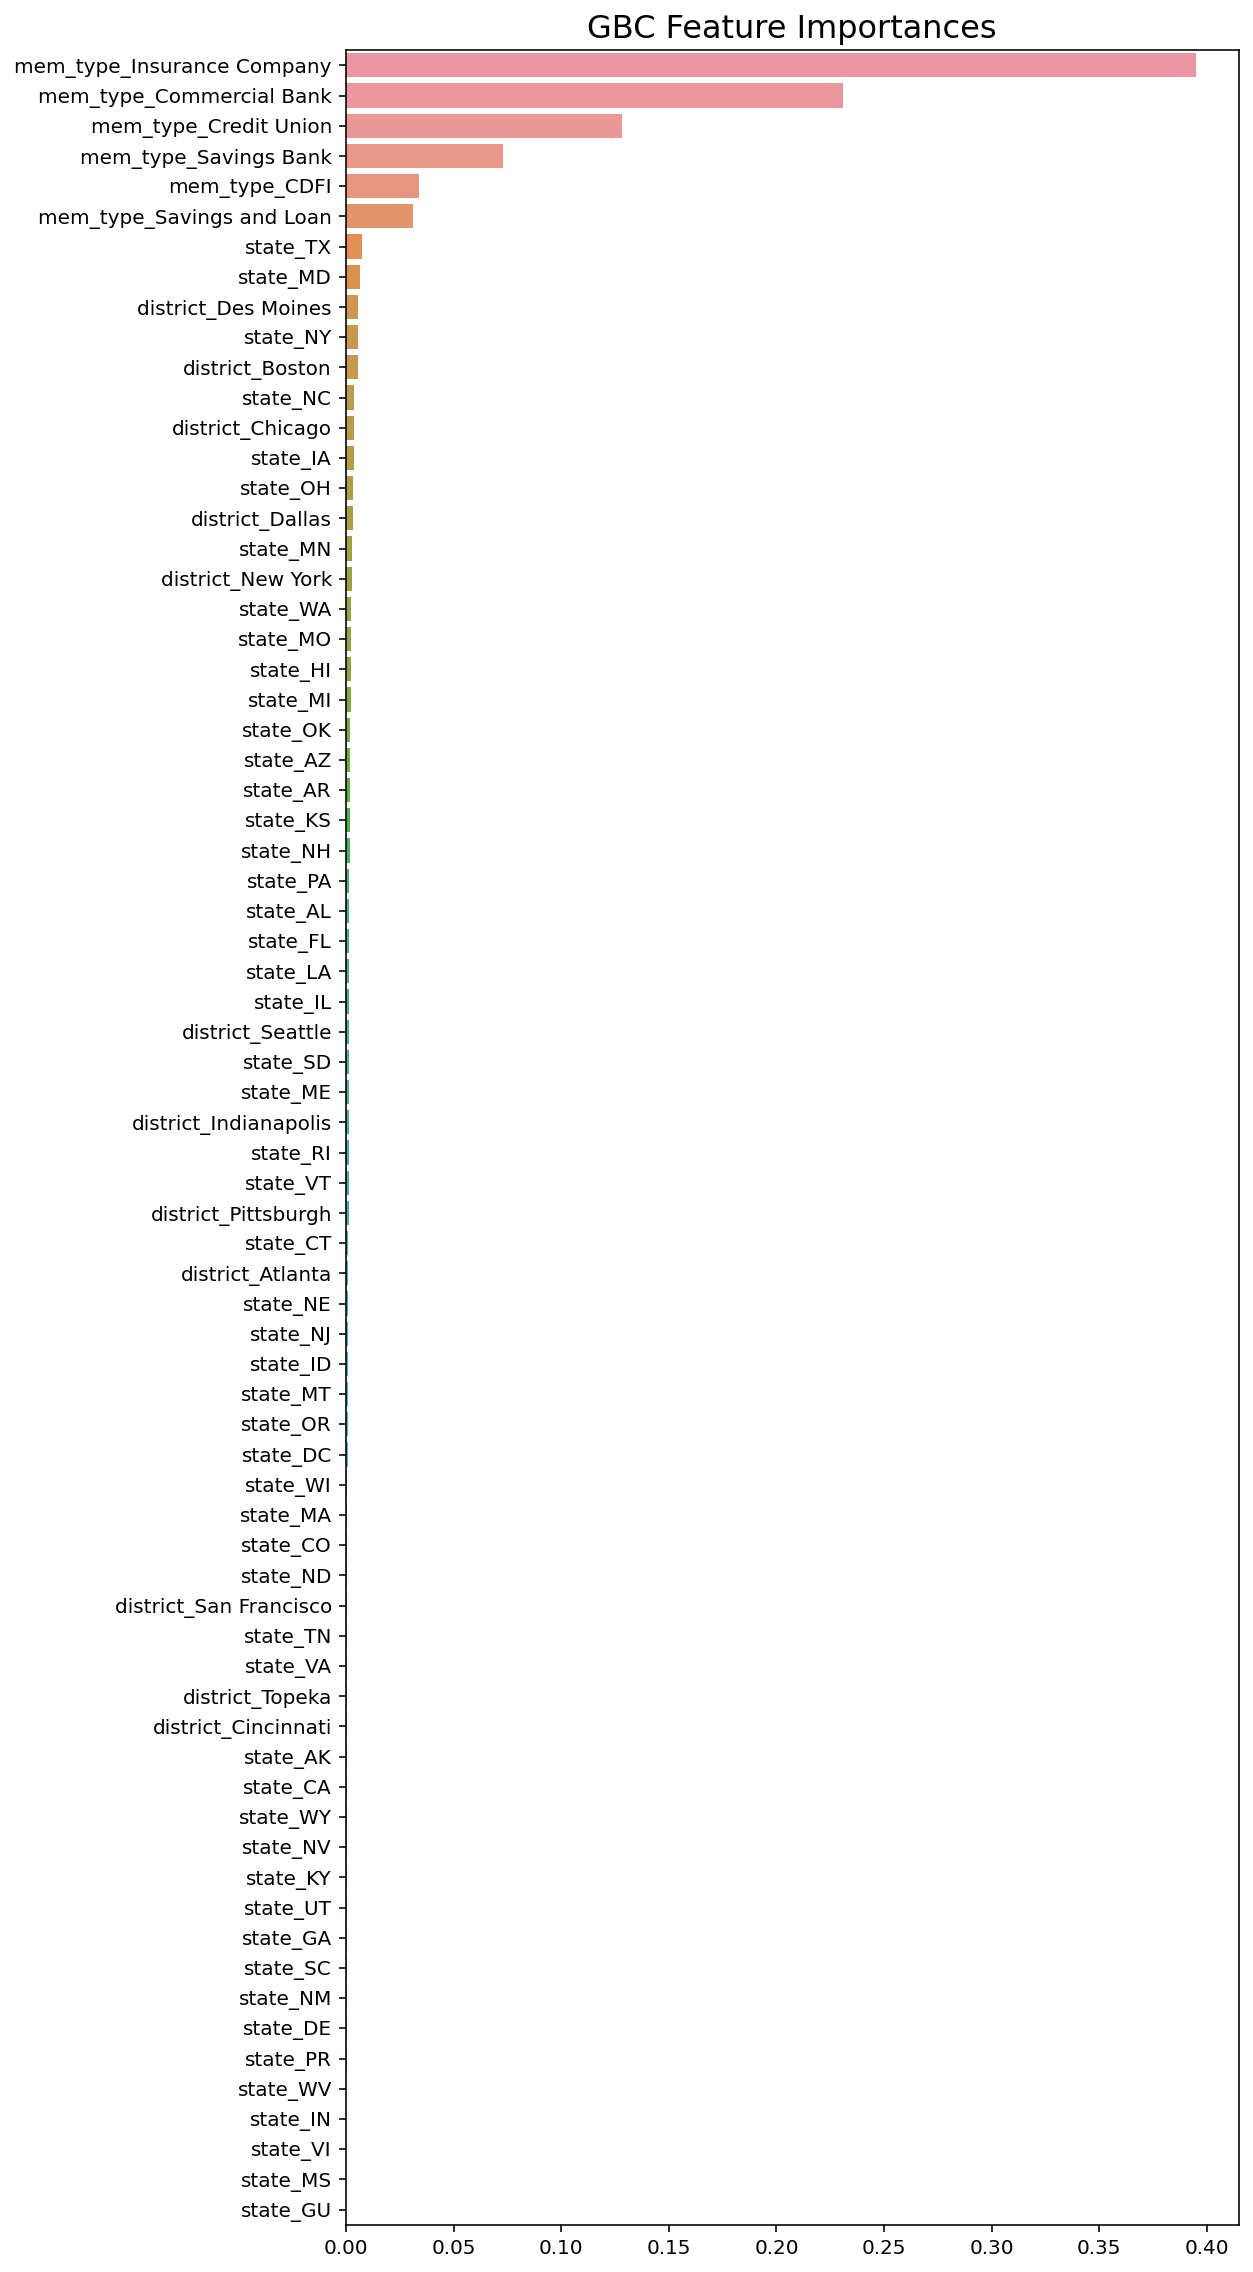

In [62]:
plt.figure(figsize=(8, 20))
plt.title('GBC Feature Importances', fontsize=16)
sns.barplot(iv, iv.index)
plt.show()

In [63]:
score['Gradient_Boost'] = accuracy_score(y_test, y_pred)

### 4) RandomForest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model = RandomForestClassifier(max_depth=20,
                               max_features=10,
                               min_samples_leaf=2,
                               random_state=2022,
                               verbose=1)

In [66]:
model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


RandomForestClassifier(max_depth=20, max_features=10, min_samples_leaf=2,
                       random_state=2022, verbose=1)

In [67]:
y_pred = model.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [68]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('cross validation score :', cross_val_score(model, x_train, y_train, scoring='accuracy'))

[[ 936    0    0   24]
 [   0  843    0  206]
 [   0    0 1008    0]
 [ 137  448    0  452]]
              precision    recall  f1-score   support

     Federal       0.87      0.97      0.92       960
    National       0.65      0.80      0.72      1049
        None       1.00      1.00      1.00      1008
       State       0.66      0.44      0.53      1037

    accuracy                           0.80      4054
   macro avg       0.80      0.80      0.79      4054
weighted avg       0.79      0.80      0.79      4054



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

cross validation score : [0.79401788 0.79555967 0.79370953 0.79155103 0.78593461]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


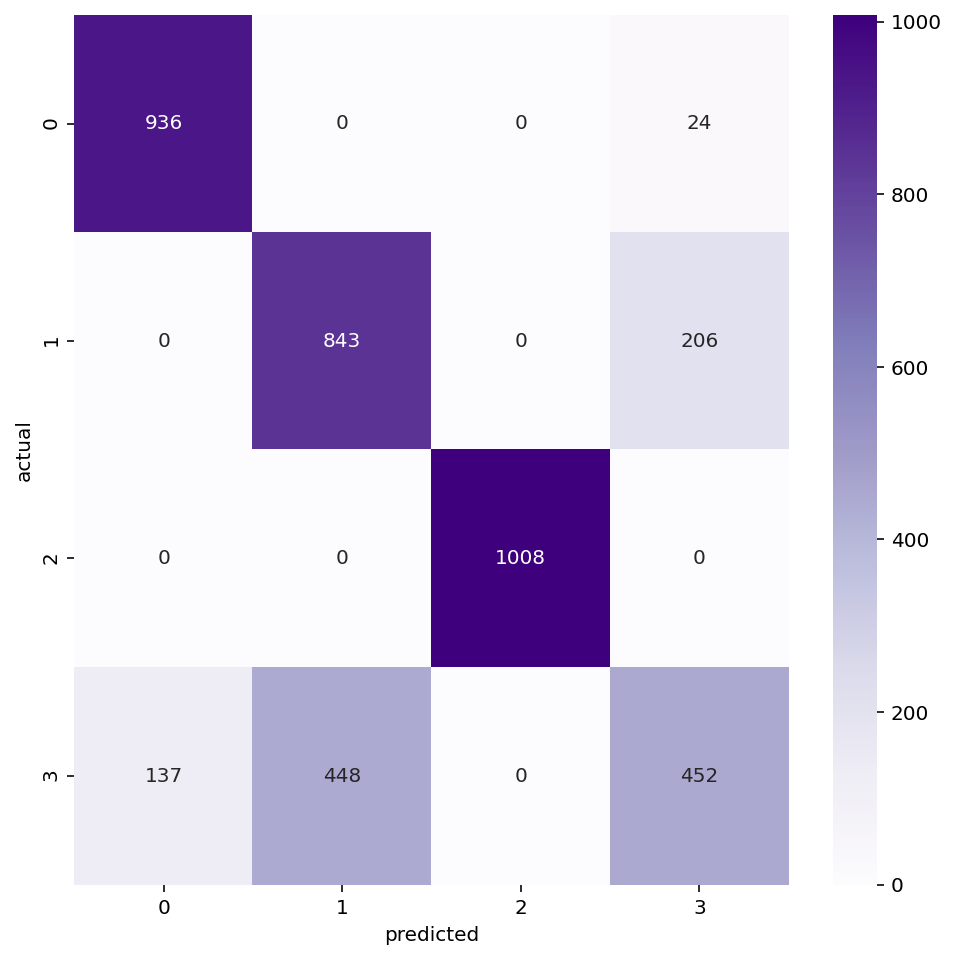

In [69]:
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Purples')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [70]:
iv = model.feature_importances_
iv = pd.Series(iv, index=x_train.columns)
iv = iv.sort_values(ascending=False)

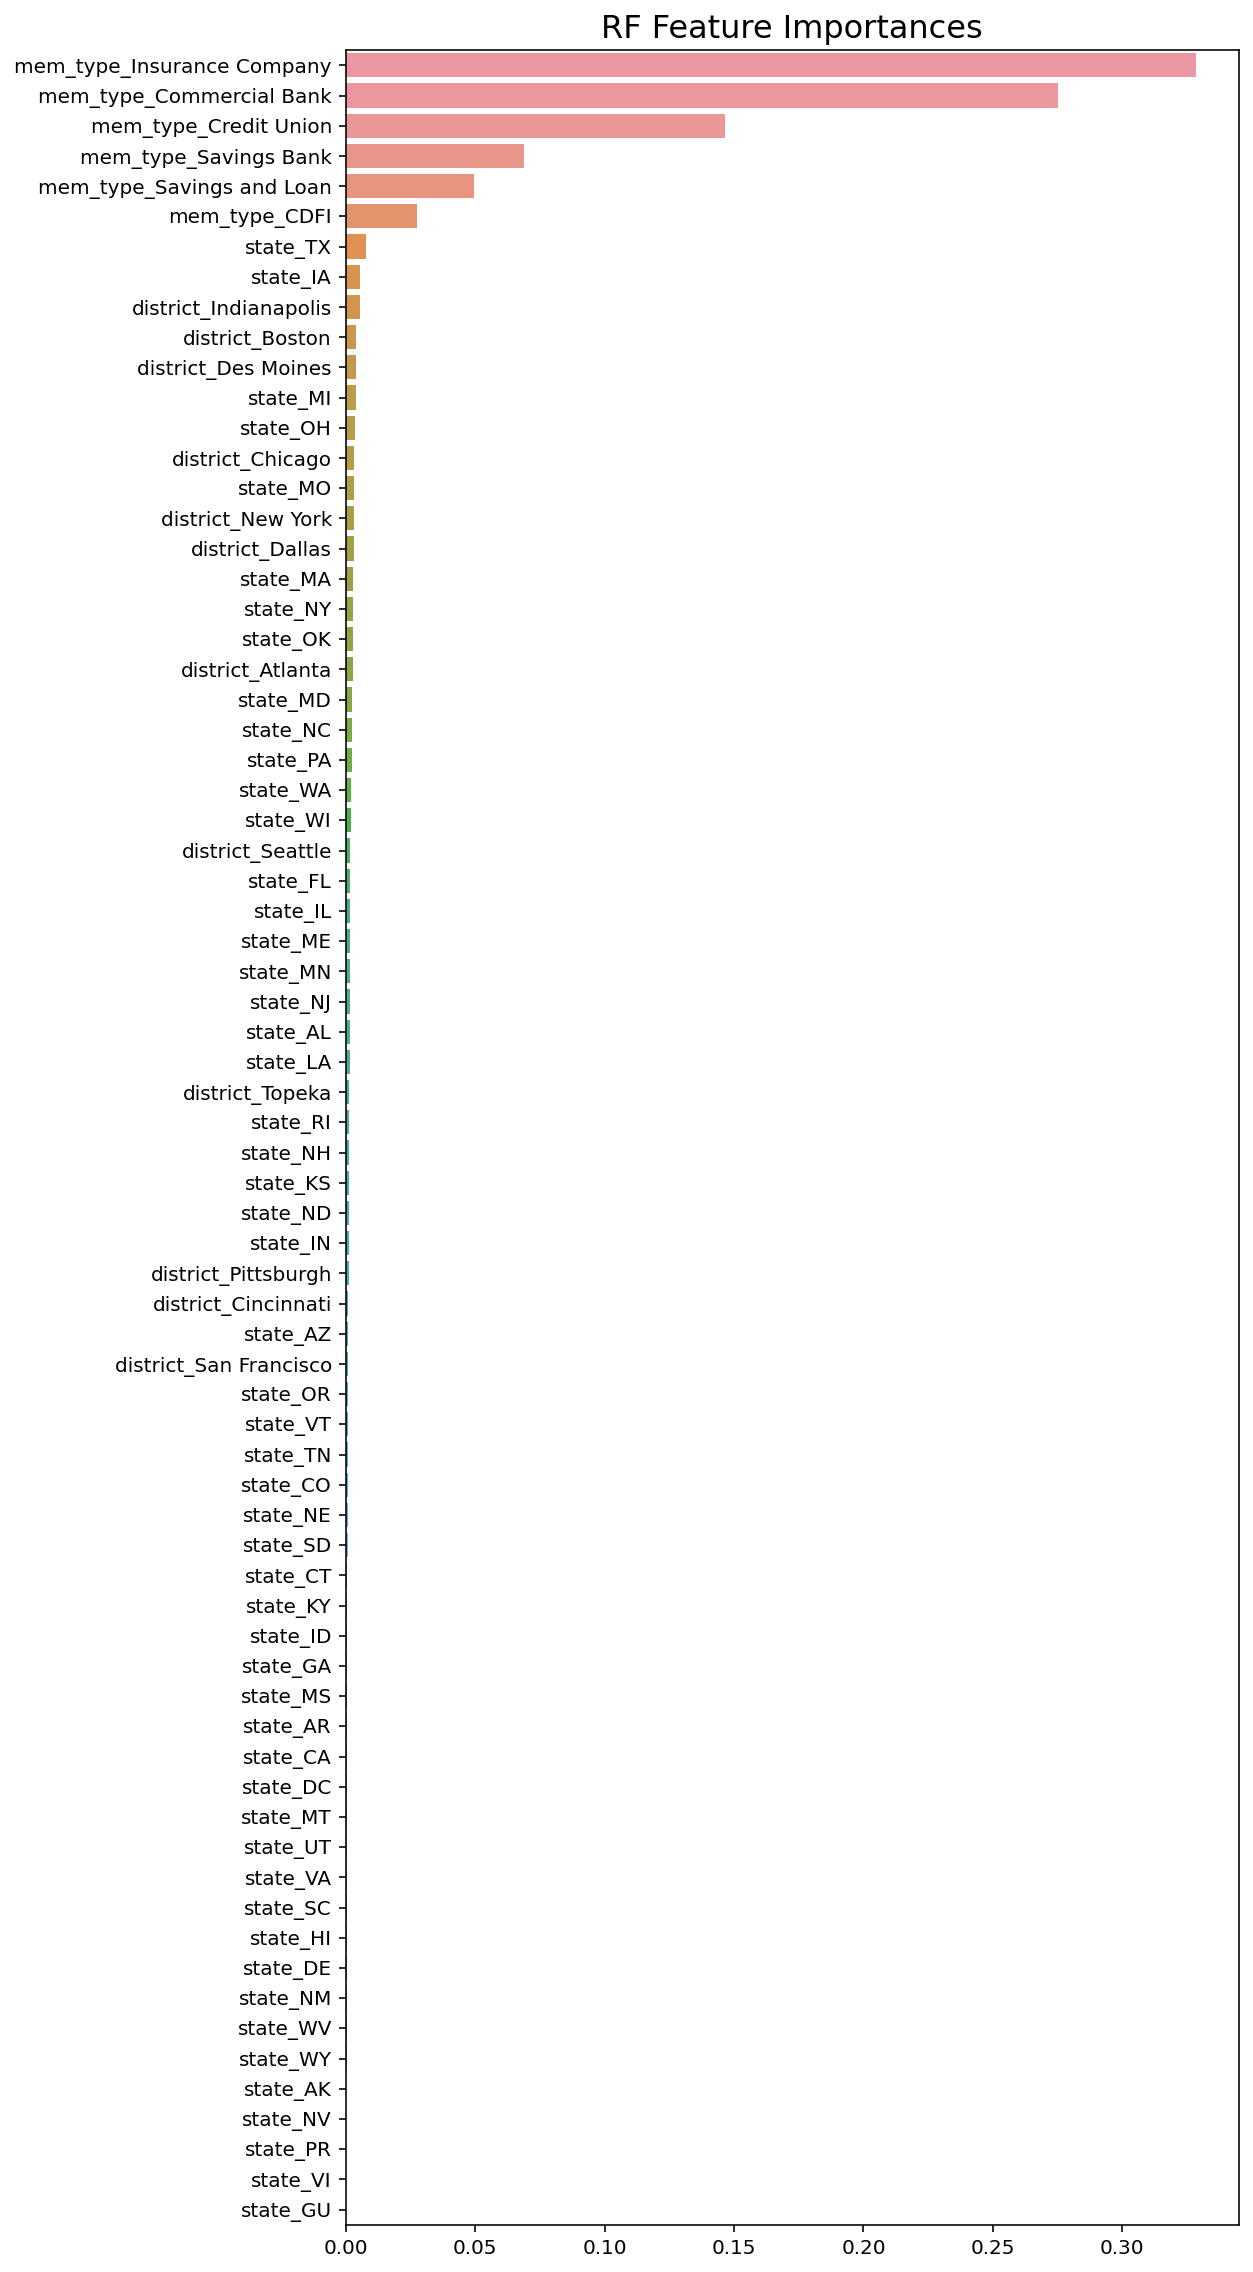

In [71]:
plt.figure(figsize=(8, 20))
plt.title('RF Feature Importances', fontsize=16)
sns.barplot(iv, iv.index)
plt.show()

In [72]:
score['Random_Forest'] = accuracy_score(y_test, y_pred)

### 5) RidgeClassifier

- Leave-One-Out Cross Validation*을 사용함
- *n개의 데이터에서 1개를 Test Set으로 정하고 나머지 n-1개의 데이터로 모델링을 하는 방법
- Ridge 분류 모델

In [73]:
from sklearn.linear_model import RidgeClassifier

In [74]:
model = RidgeClassifier(max_iter=50, random_state=2022)

In [75]:
model.fit(x_train, y_train)

RidgeClassifier(max_iter=50, random_state=2022)

In [76]:
y_pred = model.predict(x_test)

In [77]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('cross validation score :', cross_val_score(model, x_train, y_train, scoring='accuracy'))

[[ 742    0  218    0]
 [   1 1041    0    7]
 [ 486    0  522    0]
 [ 152  807   68   10]]
              precision    recall  f1-score   support

     Federal       0.54      0.77      0.63       960
    National       0.56      0.99      0.72      1049
        None       0.65      0.52      0.57      1008
       State       0.59      0.01      0.02      1037

    accuracy                           0.57      4054
   macro avg       0.58      0.57      0.49      4054
weighted avg       0.58      0.57      0.48      4054

cross validation score : [0.59019426 0.58341042 0.58988591 0.58125193 0.57094386]


In [78]:
score['Ridge'] = accuracy_score(y_test, y_pred)

### 6) ExtraTree

- 극도로 무작위화된 트리 분류기.
- 추가 트리는 구축 방식이 기존 의사 결정 트리와 다릅니다. 노드의 샘플을 두 그룹으로 분리하기 위해 최상의 분할을 찾을 때 max_features마다 무작위로 선택된 각 feature에 대해 무작위 split이 그려지고 그 중에서 가장 좋은 분할이 선택됩니다. max_features=1로 설정되면 이는 완전히 무작위적인 의사결정 트리를 구축하는 것과 같습니다.
- 요약하자면 무작위트리 인듯?

In [79]:
from sklearn.tree import ExtraTreeClassifier

In [80]:
model = ExtraTreeClassifier(max_depth=20,
                            max_features=10,
                            min_samples_leaf=2,
                            random_state=2022)

In [81]:
model.fit(x_train, y_train)

ExtraTreeClassifier(max_depth=20, max_features=10, min_samples_leaf=2,
                    random_state=2022)

In [82]:
y_pred = model.predict(x_test)

In [83]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('cross validation score :', cross_val_score(model, x_train, y_train, scoring='accuracy'))

[[852   0 101   7]
 [  0 944   1 104]
 [372   0 636   0]
 [161 642  37 197]]
              precision    recall  f1-score   support

     Federal       0.62      0.89      0.73       960
    National       0.60      0.90      0.72      1049
        None       0.82      0.63      0.71      1008
       State       0.64      0.19      0.29      1037

    accuracy                           0.65      4054
   macro avg       0.67      0.65      0.61      4054
weighted avg       0.67      0.65      0.61      4054

cross validation score : [0.76287388 0.66512488 0.63829787 0.68609312 0.64682295]


In [84]:
score['Extra_Tree'] = accuracy_score(y_test, y_pred)

### 7) XGBRF

- XGBoost + RandomForest

In [85]:
from xgboost import XGBRFClassifier

In [88]:
model = XGBRFClassifier(max_depth=20, random_state=2022)

In [89]:
model.fit(x_train, y_train)

[18:16:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=20, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=100, objective='multi:softprob',
                predictor='auto', random_state=2022, reg_alpha=0,
                scale_pos_weight=None, tree_method='exact',
                validate_parameters=1, verbosity=None)

In [90]:
y_pred = model.predict(x_test)

In [91]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('cross validation score :', cross_val_score(model, x_train, y_train, scoring='accuracy'))

[[ 933    0    0   27]
 [   0  683    0  366]
 [   0    0 1008    0]
 [ 137  311    0  589]]
              precision    recall  f1-score   support

     Federal       0.87      0.97      0.92       960
    National       0.69      0.65      0.67      1049
        None       1.00      1.00      1.00      1008
       State       0.60      0.57      0.58      1037

    accuracy                           0.79      4054
   macro avg       0.79      0.80      0.79      4054
weighted avg       0.79      0.79      0.79      4054

[18:16:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:17:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric us

In [92]:
score['XGB_RF'] = accuracy_score(y_test, y_pred)

### Accuracy

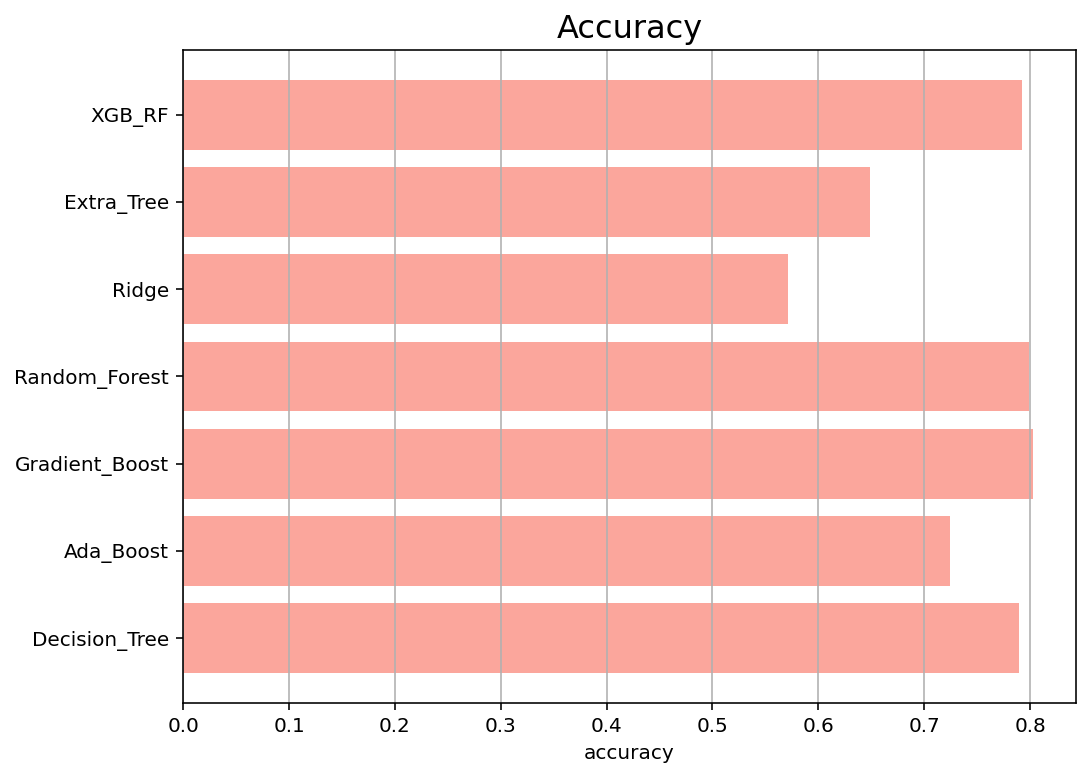

- Decision_Tree: 0.7896
- Ada_Boost: 0.7240
- Gradient_Boost: 0.8032
- Random_Forest: 0.7990
- Ridge: 0.5710
- Extra_Tree: 0.6485
- XGB_RF: 0.7926


In [94]:
plt.figure(figsize=(8, 6))
plt.title('Accuracy', fontsize=16)
plt.barh(list(score.keys()), score.values(), alpha=0.7, color='salmon')
plt.grid(axis='x')
plt.xlabel('accuracy')
plt.show()

for k, v in score.items() :
    print(f'- {k}: {v:.4f}')

- 최고의 모델 : Gradient Boost

### 튜닝

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
param = {'max_depth': range(5, 31)}

In [98]:
model_gbc = GradientBoostingClassifier()

In [99]:
model = GridSearchCV(model_gbc,
                     param,
                     cv=10,
                     n_jobs=-1)

In [100]:
model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 31)})

In [101]:
y_pred = model.predict(x_test)

In [105]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('{:.4f}'.format(accuracy_score(y_test, y_pred)))

[[ 937    0    0   23]
 [   0  789    0  260]
 [   0    0 1008    0]
 [ 137  377    0  523]]
              precision    recall  f1-score   support

     Federal       0.87      0.98      0.92       960
    National       0.68      0.75      0.71      1049
        None       1.00      1.00      1.00      1008
       State       0.65      0.50      0.57      1037

    accuracy                           0.80      4054
   macro avg       0.80      0.81      0.80      4054
weighted avg       0.80      0.80      0.80      4054

0.8034


- 튜닝 결과, accuracy가 0.0002로 아주 소폭 상승했다
- 딥러닝은 다음 편에서 계속....(분량 너무 많아지는 문제로)